<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Vaccine_%EC%83%81%ED%99%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/country_vaccinations.csv')
sub = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/country_vaccinations_by_manufacturer.csv')

In [4]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

In [5]:
train

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14658,Zimbabwe,ZWE,2021-04-25,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14659,Zimbabwe,ZWE,2021-04-26,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14660,Zimbabwe,ZWE,2021-04-27,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...
14661,Zimbabwe,ZWE,2021-04-28,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387855358...


In [6]:
data = train.copy().drop(['source_name', 'source_website'], axis=1)

In [7]:
kor_data = data[data['country'] == 'South Korea']

In [ ]:
kor_data.date.nunique()
## 64개의 데이터 입력되있음

64

In [8]:
kor_data = kor_data.sort_values(by='date', ascending=True)
# date 순으로 정렬

In [9]:
kor_data.tail(1)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
12719,South Korea,KOR,2021-04-29,3254738.0,3056004.0,198734.0,277223.0,162863.0,6.35,5.96,0.39,3177.0,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [10]:
data_group_country = data.groupby('country')['total_vaccinations_per_hundred','people_fully_vaccinated_per_hundred', 'total_vaccinations', 'daily_vaccinations_per_million'].max()

In [11]:
data_group_country = data_group_country.sort_values('total_vaccinations_per_hundred', ascending=False)

In [ ]:
data_group_country[data_group_country['total_vaccinations'] > 3000000]

,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,daily_vaccinations_per_million
country,,,,
Israel,121.24,58.82,10494321.0,21365.0
United Arab Emirates,106.64,38.79,10547584.0,15703.0
Chile,76.47,34.37,14618879.0,15607.0
Scotland,72.88,21.68,3981439.0,10255.0
England,71.59,20.87,40294585.0,9023.0
United States,70.97,29.80,237360493.0,10120.0
United Kingdom,70.91,20.69,48138009.0,8872.0
Hungary,59.98,19.47,5794447.0,12792.0
Serbia,50.12,20.65,3410440.0,9471.0


In [12]:
countries = ['United States', 'Germany', 'Spain', 'Italy', 'France','Brazil','Morocco' ,'Mexico', 'Russia', 'India', 'South Korea', 'Japan']

In [13]:
data_group_country = data_group_country.loc[countries]

In [14]:
data_group_country

,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,total_vaccinations,daily_vaccinations_per_million
country,,,,
United States,70.97,29.80,237360493.0,10120.0
Germany,34.34,7.62,28774580.0,7523.0
Spain,33.92,9.44,15859772.0,7217.0
Italy,32.12,9.52,19418615.0,6250.0
France,30.77,8.94,20969346.0,5479.0
Brazil,19.75,6.22,41989957.0,5344.0
Morocco,25.03,11.53,9239973.0,5663.0
Mexico,13.46,5.24,17357993.0,3153.0
Russia,13.38,5.05,19523861.0,2366.0


Text(0.5, 1.0, 'Primary vaccination rates and vaccination rates by country.')

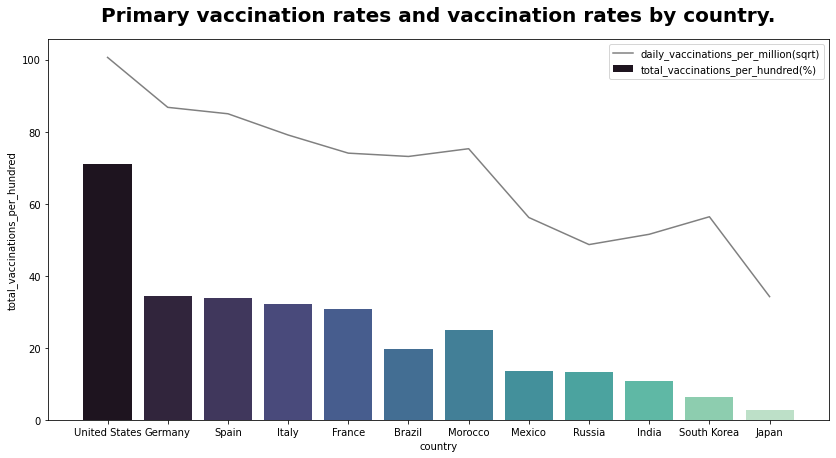

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.barplot(x=data_group_country.index, y=data_group_country['total_vaccinations_per_hundred'], label='total_vaccinations_per_hundred(%)', linewidth=.8, palette=sns.color_palette('mako', n_colors=len(data_group_country.index)))
ax = sns.lineplot(data_group_country.index, y=np.sqrt(data_group_country['daily_vaccinations_per_million']), markers='*', label='daily_vaccinations_per_million(sqrt)', color='#4a4a4a', alpha=.7, )
ax.set_title('Primary vaccination rates and vaccination rates by country.', fontsize=20, fontweight='bold', pad=18)

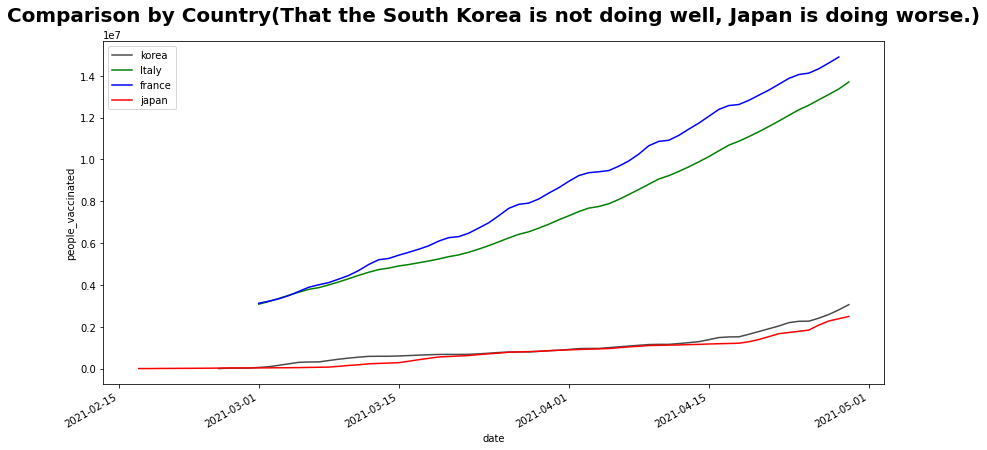

In [76]:
kor_people_vac = kor_data.groupby('date')['people_vaccinated'].max()
Italy_people_vac = data[data['country'] == 'Italy'].groupby('date')['people_vaccinated'].max()
france_people_vac = data[data['country'] == 'France'].groupby('date')['people_vaccinated'].max()
japan_people_vac = data[data['country'] == 'Japan'].groupby('date')['people_vaccinated'].max()

fig, ax = plt.subplots(figsize=(14,7))
ax = sns.lineplot(kor_people_vac.index, kor_people_vac, label='korea', color='#4a4a4a')
Italy_people_vac.loc['2021-03-01':].plot.line(ax=ax, label='Italy', color='green')
france_people_vac.loc['2021-03-01':].plot.line(ax=ax, label='france', color='blue')
ax = sns.lineplot(japan_people_vac.index, japan_people_vac, label='japan', color='red')
ax.set_title('Comparison by Country(That the South Korea is not doing well, Japan is doing worse.)', fontsize=20, pad=20, fontweight='bold')
ax.legend()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
12656,South Korea,KOR,2021-02-25,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
12657,South Korea,KOR,2021-02-26,18489.0,18489.0,NaN,18489.0,18489.0,0.04,0.04,NaN,361.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12658,South Korea,KOR,2021-02-27,20322.0,20322.0,NaN,1833.0,10161.0,0.04,0.04,NaN,198.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12659,South Korea,KOR,2021-02-28,21177.0,21177.0,NaN,855.0,7059.0,0.04,0.04,NaN,138.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12660,South Korea,KOR,2021-03-01,NaN,NaN,NaN,NaN,13576.0,NaN,NaN,NaN,265.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,South Korea,KOR,2021-04-25,2371793.0,2266888.0,104905.0,6616.0,113403.0,4.63,4.42,0.20,2212.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12716,South Korea,KOR,2021-04-26,2536478.0,2409975.0,126503.0,164685.0,119486.0,4.95,4.70,0.25,2331.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12717,South Korea,KOR,2021-04-27,2735051.0,2586769.0,148282.0,198573.0,129007.0,5.33,5.05,0.29,2516.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
12718,South Korea,KOR,2021-04-28,2977515.0,2808794.0,168721.0,242464.0,144732.0,5.81,5.48,0.33,2823.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
